In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
salaries = pd.read_csv('ds_salaries.csv')

In [3]:
salaries.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
salaries['employment_type'].unique()

array(['FT', 'CT', 'PT', 'FL'], dtype=object)

In [6]:
salaries['job_title'].unique()

array(['Data Scientist', 'Machine Learning Scientist',
       'Big Data Engineer', 'Product Data Analyst',
       'Machine Learning Engineer', 'Data Analyst', 'Lead Data Scientist',
       'Business Data Analyst', 'Lead Data Engineer', 'Lead Data Analyst',
       'Data Engineer', 'Data Science Consultant', 'BI Data Analyst',
       'Director of Data Science', 'Research Scientist',
       'Machine Learning Manager', 'Data Engineering Manager',
       'Machine Learning Infrastructure Engineer', 'ML Engineer',
       'AI Scientist', 'Computer Vision Engineer',
       'Principal Data Scientist', 'Data Science Manager', 'Head of Data',
       '3D Computer Vision Researcher', 'Data Analytics Engineer',
       'Applied Data Scientist', 'Marketing Data Analyst',
       'Cloud Data Engineer', 'Financial Data Analyst',
       'Computer Vision Software Engineer',
       'Director of Data Engineering', 'Data Science Engineer',
       'Principal Data Engineer', 'Machine Learning Developer',
       

In [7]:
salaries['job_title'].value_counts()

Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                            

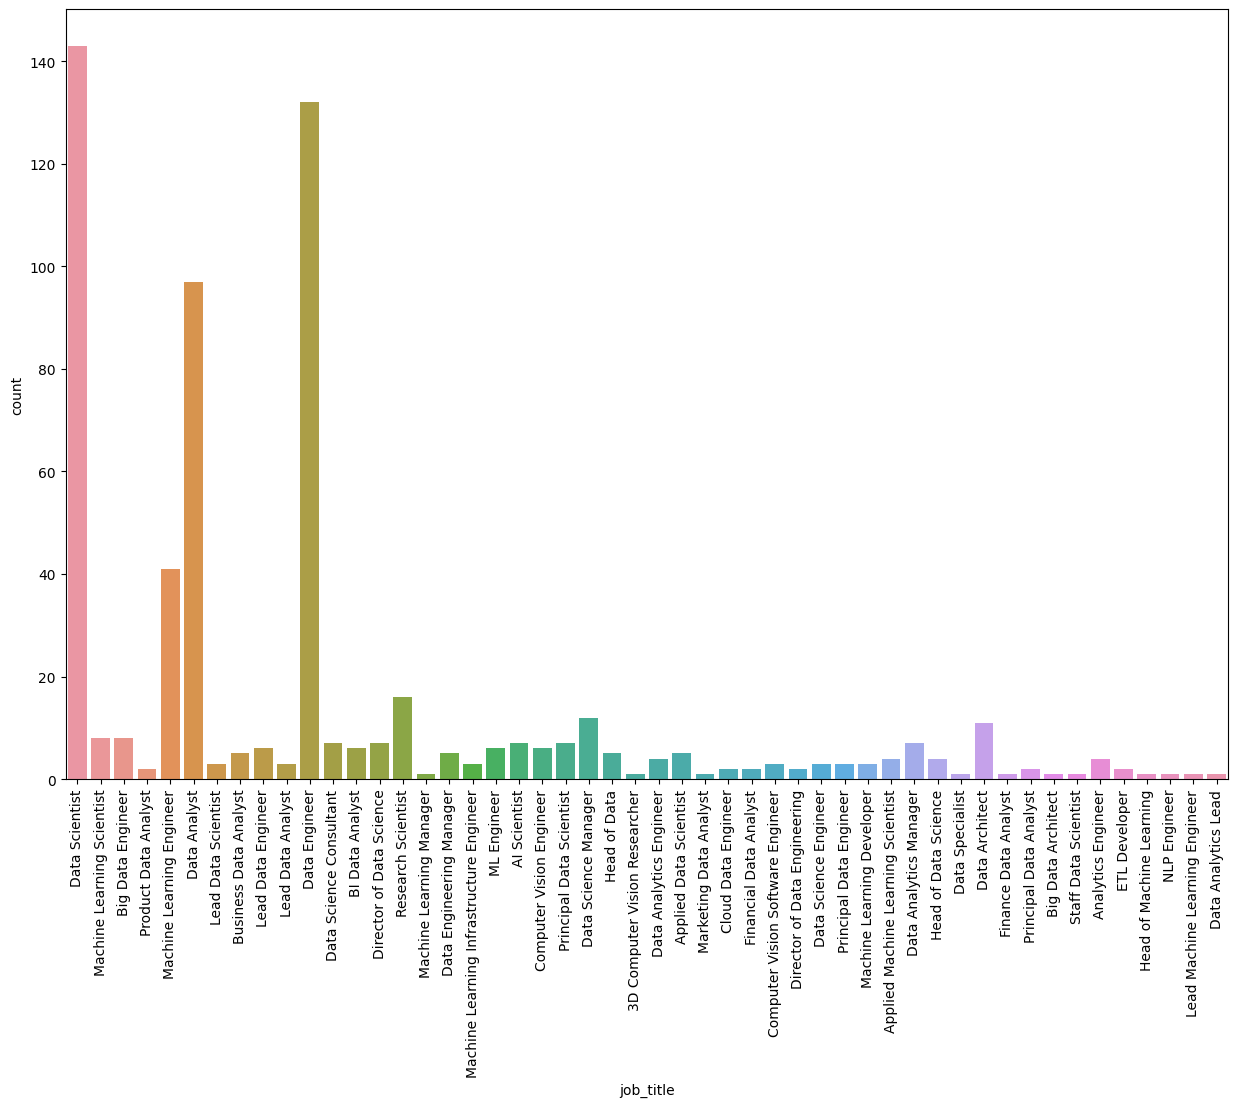

In [8]:
plt.figure(figsize = (15,10))
sns.countplot(x = 'job_title', data = salaries)
plt.xticks(rotation = 90)
plt.show()

## Grouping Job Titles into Broader Categories

In [9]:
data_science = "Data Scientist|NLP"
data_analyst = "Analyst|Analytics"
data_engineer = "Data Engineer|ETL|Infrastructure|Architect"
ml_engineer = "Machine Learning|ML|Computer Vision|Big Data|AI"
manager = "Manager|Lead|Head|Staff|Principal|Director"
consultant = "Consultant|Freelance"

In [10]:
# making categories list
categories = ["Data Scientist","Data Analytics","Data Engineering","Machine Learning", "Managerial", "Consultant"]

In [11]:
# conditions used to categorize job titles:
condition = [
    (salaries['job_title'].str.contains(data_science)),
    (salaries['job_title'].str.contains(data_analyst)),
    (salaries['job_title'].str.contains(data_engineer)),
    (salaries['job_title'].str.contains(ml_engineer)),
    (salaries['job_title'].str.contains(manager)),
    (salaries['job_title'].str.contains(consultant))
]

In [12]:
# Transforming job titles into broader categories
salaries['job_title'] = np.select(condition,categories,default = 'Other')

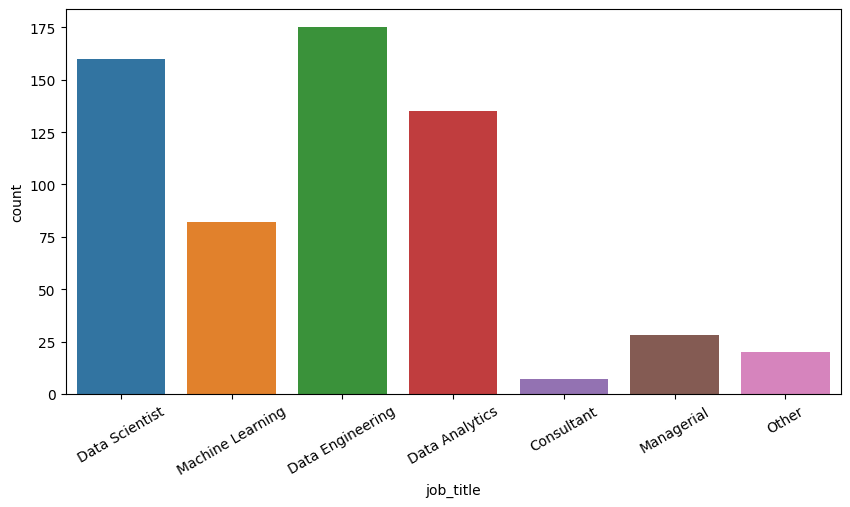

In [13]:
# plotting categorize job title
plt.figure(figsize = (10,5))
sns.countplot(x = 'job_title', data = salaries)
plt.xticks(rotation = 30)
plt.show()

## Outliers

<AxesSubplot: ylabel='salary_in_usd'>

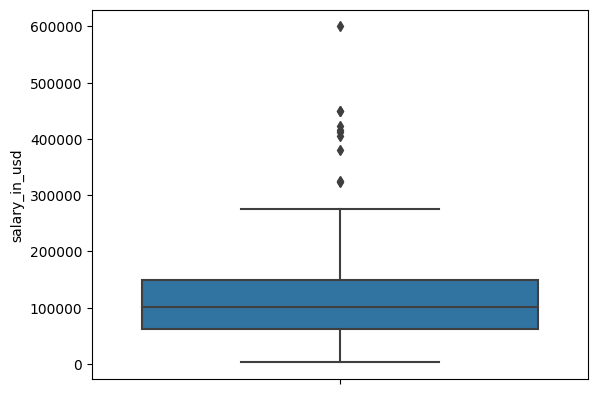

In [14]:
sns.boxplot(y = 'salary_in_usd',data = salaries)

<AxesSubplot: xlabel='salary_in_usd', ylabel='Count'>

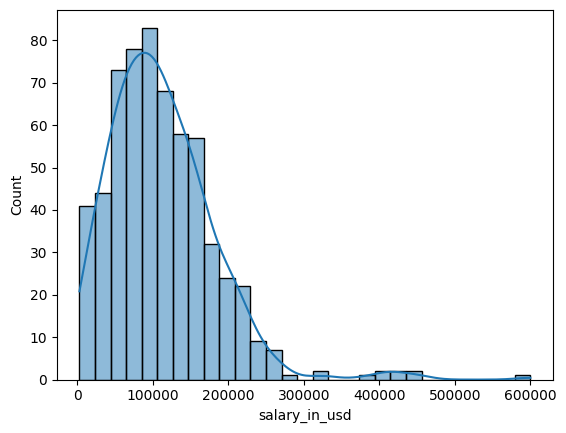

In [15]:
sns.histplot(x = 'salary_in_usd', data = salaries, kde = True)

## Removing Outliers

In [16]:
seventy_fifth = salaries['salary_in_usd'].quantile(0.75)
twenty_fifth = salaries['salary_in_usd'].quantile(0.25)
iqr = seventy_fifth - twenty_fifth

In [17]:
upper = seventy_fifth + (1.5*iqr)
lower = twenty_fifth - (1.5*iqr)

In [18]:
salaries_without_out = salaries[(salaries['salary_in_usd']>lower) & (salaries['salary_in_usd'] < upper)]

<AxesSubplot: xlabel='salary_in_usd', ylabel='Count'>

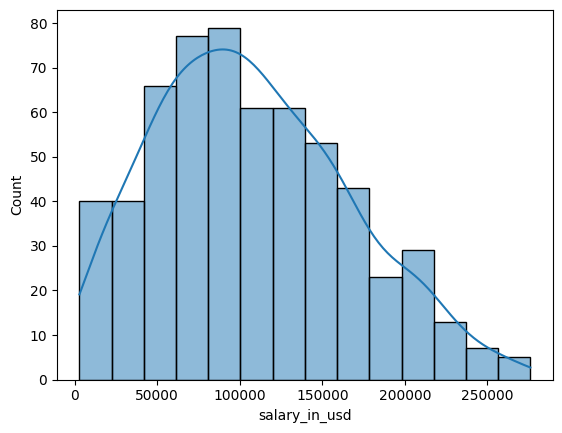

In [19]:
sns.histplot(data = salaries_without_out, x = 'salary_in_usd', kde = True)

## Visualizing Salaries Distribution Based on Different Job Aspects (Bar Plot)

<AxesSubplot: xlabel='job_title', ylabel='salary_in_usd'>

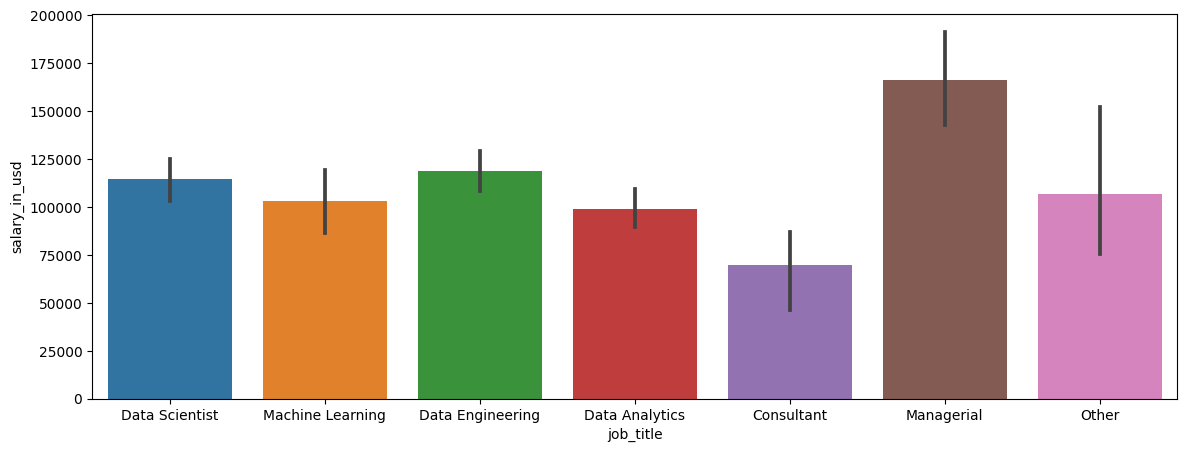

In [20]:
# Creating a bar plot without outlier to visualize the relationship between job titles and salaries 
plt.figure(figsize = (14,5))
sns.barplot(x = 'job_title', y= 'salary_in_usd', data = salaries)

In [21]:
mean = salaries.groupby('job_title')['salary_in_usd'].agg(mean_salary = 'mean')

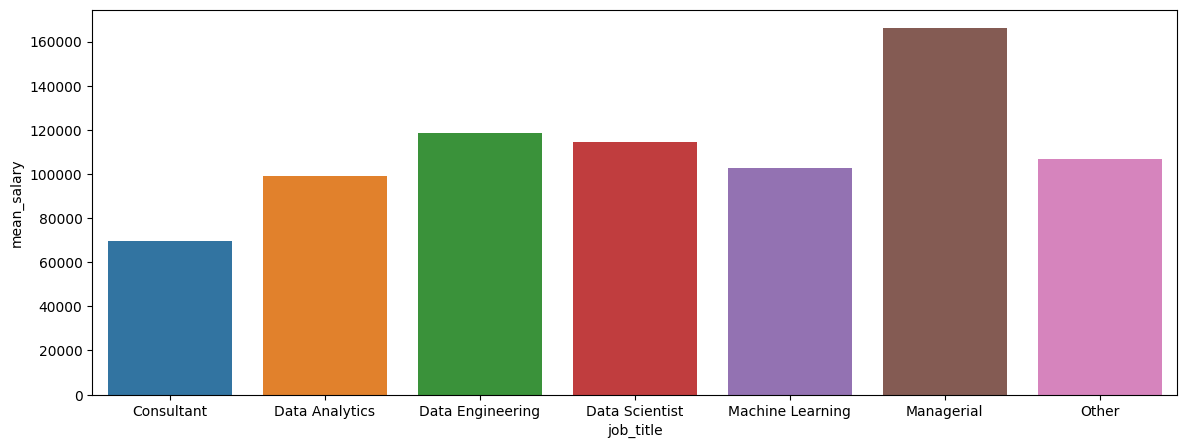

In [22]:
# Creating a bar plot to visualize the relationship between job titles and mean_usd_salaries 
plt.figure(figsize = (14,5))
sns.barplot(x = mean.index, y = 'mean_salary', data = mean)
plt.show()

<AxesSubplot: xlabel='employment_type', ylabel='salary_in_usd'>

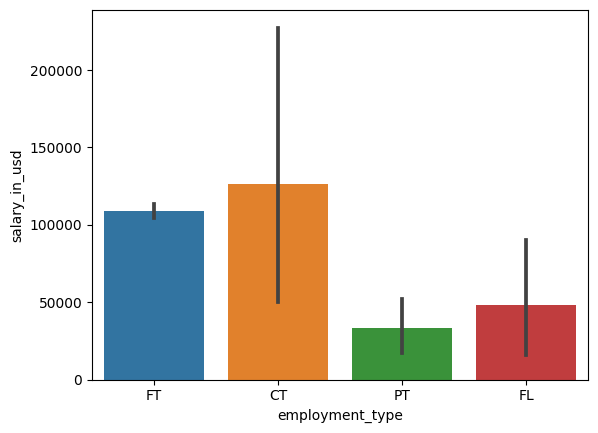

In [23]:
# Creating a bar plot to visualize the relationship between employement_type and salaries_in_usd
sns.barplot(x = 'employment_type', y = 'salary_in_usd', data = salaries_without_out)

In [24]:
salaries['experience_level'].unique()

array(['MI', 'SE', 'EN', 'EX'], dtype=object)

<AxesSubplot: xlabel='experience_level', ylabel='salary_in_usd'>

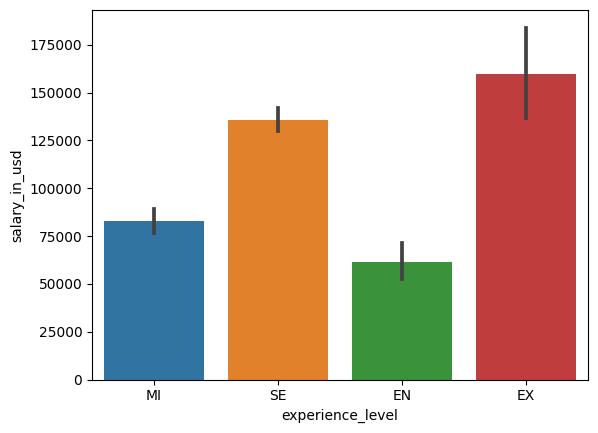

In [25]:
#Creating a bar plot to visualize the relationship between experience level and salaries_in_usd
sns.barplot(x = 'experience_level', y = 'salary_in_usd', data = salaries_without_out)

<AxesSubplot: xlabel='remote_ratio', ylabel='salary_in_usd'>

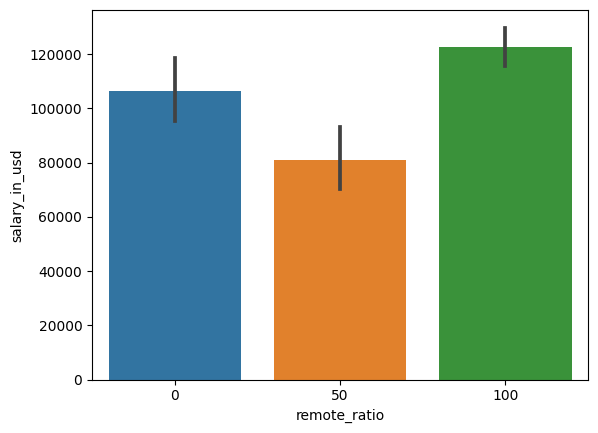

In [26]:
#Creating a bar plot to visualize the relationship between remote ratio and salaries_in_usd
sns.barplot(x = 'remote_ratio', y = 'salary_in_usd', data = salaries)

## Distribution of job roles

Text(0.5, 1.0, 'Distribuion of Jobs ')

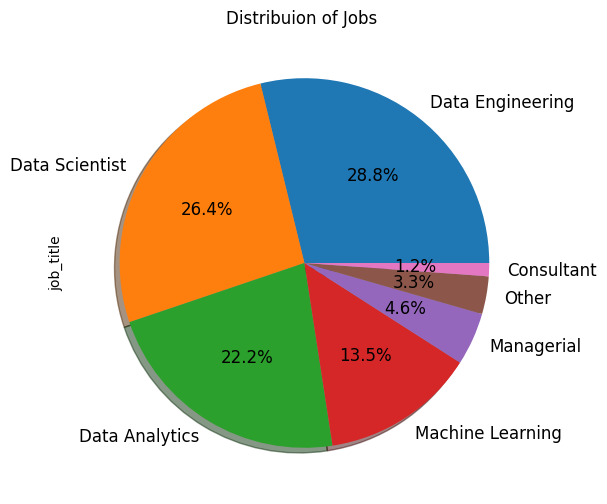

In [27]:
# Creating a pie chart to visualize the distribution of job titles
salaries['job_title'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(15,6),fontsize=12, shadow=True)
plt.title("Distribuion of Jobs ")